## Naive Bayes Classification

In [7]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
    
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)

In [9]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()
 
# Train the model using the training sets
model.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = model.predict(feature_test)

In [10]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7748917748917749
Precision: 0.7391304347826086
Recall: 0.6
F1-Score: 0.6623376623376623


## Decision Tree Classification

In [11]:
# Import Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Create a Decision Tree classifier object
clf = DecisionTreeClassifier()
 
# Train the model using training dataset
clf = clf.fit(feature_train,target_train)
 
# Predict the response for test dataset
predictions = clf.predict(feature_test)
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.683982683982684
Precision: 0.581081081081081
Recall: 0.5058823529411764
F1-Score: 0.540880503144654


## K-Nearest Neighbors Classification

In [12]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=3)
 
# Train the model using the training dataset
model.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = model.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7532467532467533
Precision: 0.7058823529411765
Recall: 0.5647058823529412
F1-Score: 0.6274509803921569


## SVM Classification

In [13]:
# Import SVM model
from sklearn import svm
 
# Create a SVM classifier object
clf = svm.SVC(kernel='linear') 
 
# Train the model using the training sets
clf.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = clf.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7835497835497836
Precision: 0.7868852459016393
Recall: 0.5647058823529412
F1-Score: 0.6575342465753424


## Confusion Matrix

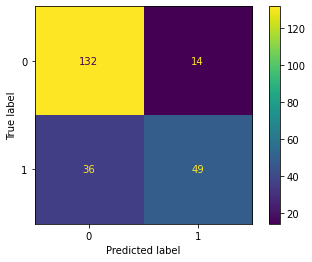

In [14]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")

# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

# Get prediction probability 
predictions_prob = logreg.predict_proba(feature_test)[::,1]


# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(logreg , feature_test, target_test, values_format='d')

## Confusion Report

In [15]:
# import classification report
from sklearn.metrics import classification_report

# Create classification report
print(classification_report(target_test, predictions, target_names=['Yes(1)','No(0)']))

              precision    recall  f1-score   support

      Yes(1)       0.79      0.90      0.84       146
       No(0)       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



## ROC Curve and AUC

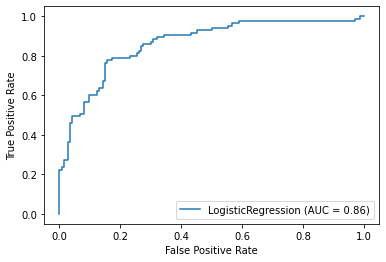

In [16]:
# import plot_roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logreg, feature_test, target_test)

In [17]:
# import roc auc score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.8628525382755843
